In [ ]:
!pip install nltk

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin1')
    dataset.columns = cols
    return dataset

In [13]:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [19]:
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    # if len(filtered_words)<280:
        # filtered_words += ['the']*(350 - len(filtered_words)) 
    # ps = PorterStemmer()
    # stemmed_words = [ps.stem(w) for w in filtered_words]
    # lemmatizer = WordNetLemmatizer()
    # lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

In [6]:
VOCAB_SIZE=1000
def get_feature_vector(train_fit):
    encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
    
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
# # Load dataset
# dataset = load_dataset("/content/drive/MyDrive/tweet_sa/train.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text', 'Sentiment'])
# # Remove unwanted columns from dataset
# dataset = remove_unwanted_cols(dataset, ['ScreenName', 'Location', 'TweetAt', 'UserName'])
# #Preprocess data
# dataset.text = dataset['text'].apply(preprocess_tweet_text)
# # Split dataset into Train, Test
# # Same tf vector will be used for Testing sentiments on unseen trending data
# tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
# X = tf_vector.transform(np.array(dataset.iloc[:, 0]).ravel())
# y = np.array(dataset.iloc[:, 1]).ravel()
# # print(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# X_train

In [ ]:
# # # Training Naive Bayes model
# # NB_model = MultinomialNB()
# # NB_model.fit(X_train, y_train)
# # y_predict_nb = NB_model.predict(X_test)
# # print(accuracy_score(y_test, y_predict_nb))

# # Training Logistics Regression model
# LR_model = LogisticRegression()
# LR_model.fit(X_train, y_train)
# y_predict_lr = LR_model.predict(X_test)
# print(accuracy_score(y_test, y_predict_lr))

# # # Training SVM model
# # SVM_model = SVC()
# # SVM_model.fit(X_train, y_train)
# # y_predict_svm = SVM_model.predict(X_test)

# # print(accuracy_score(y_test, y_predict_svm))

In [7]:
from sklearn import preprocessing
from sklearn import model_selection
le = preprocessing.LabelEncoder()

In [16]:
train_dataset = load_dataset("./train.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text', 'label'])
train_dataset = remove_unwanted_cols(train_dataset, ['ScreenName', 'Location', 'TweetAt', 'UserName'])

train_dataset.head()

# text, category = pd.DataFrame(dataset['OriginalTweet']).to_numpy(), pd.DataFrame(dataset['Sentiment']).to_numpy()
# X_train, X_test, y_train, y_test = train_test_split(text, category, test_size=0.2, random_state=30)

,text,label
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [17]:
train_dataset.text = train_dataset['text'].apply(preprocess_tweet_text)

NameError: name 'preprocess_tweet_text' is not defined

In [16]:
le.fit(train_dataset['label'])
train_dataset['label'] = le.transform(train_dataset['label'])
# X_train, X_test, y_train, y_test = model_selection.train_test_split(train_dataset['text'],train_dataset['label'])

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_dataset['text'], train_dataset['label']))
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [21]:
test_dataset = load_dataset("./test.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text'])
test_dataset = remove_unwanted_cols(test_dataset, ['ScreenName', 'Location', 'TweetAt', 'UserName'])
test_dataset.text = test_dataset['text'].apply(preprocess_tweet_text)
# test_dataset.head()
test_dataset = tf.data.Dataset.from_tensor_slices((test_dataset['text']))

In [22]:
train_dataset.element_spec
test_dataset.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

In [23]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [24]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [25]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  [b'Hey friends The arts crafts store I work refusing close stores claiming essential retail Ups drop support small business Please sign petition spread around'
 b'Convenience food firm Greencore Group said trading first five months year broadly line expectations business steps efforts meet increased demand due coronavirus'
 b'Me grocery store gas station somebody sneezes coughs coronavirus COVID19 invasionofthebodysnatchers'
 b'These reserved hours elderly compromised immune systems ok fine But grocery store workers masks gloves Coronavirus'
 b'Food pantries experiencing perfect storm coronavirus oregon'
 b'Coronavirus Panic UK People Saying'
 b'If need baby milk anything extreme importance shops bumbed prices \xc3\x82\xc2\xa340 take dont pay profiteering scumbags COVID19 lockdownuk CoronaVirusUpdate StaySafeStayHome coronavirus ThursdayThoughts saveworkers ThursdayMotivation'
 b'SWEET BABY JESUS amp ALL HIS APOSTLES I swear 2 God Im going 2 throat punch COVID19 FOOD HOARDERS Th

In [26]:
VOCAB_SIZE=5000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [27]:
vocab = np.array(encoder.get_vocabulary())
print(vocab[:20])
encoded_example = encoder(example).numpy()
inp = encoded_example[0]
inp

['' '[UNK]' 'coronavirus' 'covid19' 'i' 'prices' 'food' 'supermarket'
 'store' 'grocery' 'people' 'amp' 'consumer' 'the' '19' 'shopping'
 'online' 'covid' 'pandemic' 'get']


array([ 680,  460,   13,    1,    1,    8,    4,   45, 2388,  253,   53,
       2735,   95,   48, 3063,  324,  132,  263,   88,   42,  636, 1697,
         93,  144,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0], dtype=int64)

In [28]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'Hey friends The arts crafts store I work refusing close stores claiming essential retail Ups drop support small business Please sign petition spread around'
Round-trip:  hey friends the [UNK] [UNK] store i work refusing close stores claiming essential retail ups drop support small business please sign petition spread around                         

Original:  b'Convenience food firm Greencore Group said trading first five months year broadly line expectations business steps efforts meet increased demand due coronavirus'
Round-trip:  convenience food firm [UNK] group said trading first five months year [UNK] line expectations business steps efforts meet increased demand due coronavirus                           

Original:  b'Me grocery store gas station somebody sneezes coughs coronavirus COVID19 invasionofthebodysnatchers'
Round-trip:  me grocery store gas station somebody [UNK] coughs coronavirus covid19 [UNK]                                      



In [29]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Dense(layer1, input_shape=(features,), activation='relu'),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Dense(layer2, activation='sigmoid'),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Dense(5, activation='softmax')
])
model_nn.add(tf.keras.layers.Dense(layer1, input_shape=(features,), activation='relu'))
model_nn.add(tf.keras.layers.Dropout(drop))
model_nn.add(tf.keras.layers.Dense(layer2, activation='sigmoid'))
model_nn.add(tf.keras.layers.Dropout(drop))
model_nn.add(tf.keras.layers.Dense(5, activation='softmax'))
# model.add(Embedding(vocab_size, 100, input_length=max_length))
# model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model = tf.keras.Sequential([
#     encoder,
#     tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
#     tf.keras.layers.LSTM(128,return_sequences=True),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

NameError: name 'layer1' is not defined

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [44]:
def tokenization_tweets(dataset, features):
    tokenization = TfidfVectorizer(max_features=features)
    tokenization.fit(dataset)
    dataset_transformed = tokenization.transform(dataset).toarray()
    return dataset_transformed

In [14]:
df_train = load_dataset("./train.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text', 'label'])
df_train = remove_unwanted_cols(df_train, ['ScreenName', 'Location', 'TweetAt', 'UserName'])

train_docs = df_train['text']

In [121]:
# VOCAB_SIZE=5000
# tokenizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
#     max_tokens=VOCAB_SIZE)
# tokenizer.adapt(np.array(df_train['text']))
# vocab = np.array(encoder.get_vocabulary())
# print(vocab[:20])

# encoded_example = encoder(example).numpy()

tokenizer = tf.keras.preprocessing.text.Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)


# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)


max_length = max([len(s.split()) for s in train_docs])
print(max_length)
Xtrain = tf.keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_length, padding='post')

le.fit(df_train['label'])
ytrain = le.transform(df_train['label'])
# define training labels
# ytrain = np.array([0 for _ in range(900)] + [1 for _ in range(900)])

# ytrain = df_train['label']
 
# # load all test reviews
# positive_docs = process_docs('txt_sentoken/pos', vocab, False)
# negative_docs = process_docs('txt_sentoken/neg', vocab, False)
# test_docs = negative_docs + positive_docs
# # sequence encode
# encoded_docs = tokenizer.texts_to_sequences(test_docs)
# # pad sequences
# Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# # define test labels
# ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])
 
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1

64


In [15]:
tokenizer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=10000)
tokenizer.adapt(np.array(df_train['text']))
vocab = np.array(tokenizer.get_vocabulary())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc2 in position 2: unexpected end of data

In [33]:
features = 3500
shuffle = True
drop = 0.5
layer1 = 512
layer2 = 256
epoch = 5
lr = 0.001
epsilon = None
validation = 0.1
X_train_mod = tokenization_tweets(X_train, features)
model_nn = tf.keras.Sequential()
model_nn.add
model_nn.add(tf.keras.layers.Dense(layer1, input_shape=(features,), activation='relu'))
model_nn.add(tf.keras.layers.Dropout(drop))
model_nn.add(tf.keras.layers.Dense(layer2, activation='sigmoid'))
model_nn.add(tf.keras.layers.Dropout(drop))
model_nn.add(tf.keras.layers.Dense(5, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=epsilon, decay=0.0, amsgrad=False)
model_nn.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])



In [14]:
features = 3500
shuffle = True
drop = 0.5
layer1 = 512
layer2 = 256
epoch = 5
lr = 0.001
epsilon = None
validation = 0.1

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 100, input_length=max_length))
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=epsilon, decay=0.0, amsgrad=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

h = model.fit(x=Xtrain, y=ytrain, epochs=10)

Epoch 1/10
1287/1287 [==============================] - 103s 79ms/step - loss: 1.3230 - accuracy: 0.4241
Epoch 2/10
1287/1287 [==============================] - 100s 78ms/step - loss: 0.5514 - accuracy: 0.8105
Epoch 3/10
1287/1287 [==============================] - 104s 81ms/step - loss: 0.2711 - accuracy: 0.9161
Epoch 4/10
1287/1287 [==============================] - 101s 79ms/step - loss: 0.1376 - accuracy: 0.9587
Epoch 5/10
1287/1287 [==============================] - 115s 90ms/step - loss: 0.0724 - accuracy: 0.9780
Epoch 6/10
1287/1287 [==============================] - 115s 89ms/step - loss: 0.0312 - accuracy: 0.9914
Epoch 7/10
1287/1287 [==============================] - 113s 88ms/step - loss: 0.0188 - accuracy: 0.9950
Epoch 8/10
1287/1287 [==============================] - 121s 94ms/step - loss: 0.0169 - accuracy: 0.9956
Epoch 9/10
1287/1287 [==============================] - 117s 91ms/step - loss: 0.0154 - accuracy: 0.9962
Epoch 10/10
1287/1287 [==============================] 

In [ ]:
his = h
h = model.fit(x=X)

In [15]:
df_test = load_dataset("./test.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text'])
df_test = remove_unwanted_cols(df_test, ['ScreenName', 'Location', 'TweetAt', 'UserName'])
df_test.text = df_test['text'].apply(preprocess_tweet_text)

# tokenizer = tf.keras.preprocessing.text.Tokenizer()
# fit the tokenizer on the documents
# tokenizer.fit_on_texts(train_docs)


# sequence encode
encoded_tst = tokenizer.texts_to_sequences(df_test['text'])

# pad sequences
max_length = max([len(s.split()) for s in train_docs])

dftest = tf.keras.preprocessing.sequence.pad_sequences(encoded_tst, maxlen=max_length, padding='post')

new_preds = model.predict(np.array(dftest))
new_preds1 = model.predict(np.array(Xtrain))

new_preds


array([[2.4850176e-05, 1.2078590e-10, 9.9895358e-01, 8.8963861e-06,
        1.0125474e-03],
       [1.7311200e-14, 2.8100066e-04, 7.7941102e-08, 2.1062931e-07,
        9.9971873e-01],
       [9.2032797e-17, 9.9925858e-01, 4.5596273e-11, 1.1258794e-12,
        7.4140093e-04],
       ...,
       [1.5576548e-10, 1.8244510e-11, 3.5734996e-05, 9.9996066e-01,
        3.5347393e-06],
       [9.9866664e-01, 3.0180472e-14, 1.3320743e-03, 4.2511293e-11,
        1.3395138e-06],
       [2.8992145e-26, 9.9999988e-01, 4.3975089e-20, 3.6971139e-22,
        8.6071665e-08]], dtype=float32)

In [101]:
print(len(new_preds))

3798


In [35]:
history_nn = model_nn.fit(np.array(X_train_mod), y_train,
                batch_size=32,
                epochs=10,
                verbose=1,
                validation_split=validation,
                shuffle=shuffle)

Epoch 1/10
869/869 [==============================] - 8s 9ms/step - loss: 0.8092 - accuracy: 0.6947 - val_loss: 0.9313 - val_accuracy: 0.6408
Epoch 2/10
869/869 [==============================] - 8s 9ms/step - loss: 0.7129 - accuracy: 0.7335 - val_loss: 0.9734 - val_accuracy: 0.6369
Epoch 3/10
869/869 [==============================] - 7s 8ms/step - loss: 0.6173 - accuracy: 0.7697 - val_loss: 1.0045 - val_accuracy: 0.6398
Epoch 4/10
869/869 [==============================] - 8s 9ms/step - loss: 0.5167 - accuracy: 0.8089 - val_loss: 1.0713 - val_accuracy: 0.6369
Epoch 5/10
869/869 [==============================] - 8s 9ms/step - loss: 0.4179 - accuracy: 0.8482 - val_loss: 1.1640 - val_accuracy: 0.6343
Epoch 6/10
869/869 [==============================] - 8s 9ms/step - loss: 0.3238 - accuracy: 0.8859 - val_loss: 1.2806 - val_accuracy: 0.6197
Epoch 7/10
869/869 [==============================] - 8s 9ms/step - loss: 0.2521 - accuracy: 0.9102 - val_loss: 1.4448 - val_accuracy: 0.6203
Epoch 

In [ ]:
# train_data = tokenization_tweets()
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

In [45]:
test_dataset = load_dataset("./test.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text'])
test_dataset = remove_unwanted_cols(test_dataset, ['ScreenName', 'Location', 'TweetAt', 'UserName'])
test_dataset.text = test_dataset['text'].apply(preprocess_tweet_text)

test_data11 = tokenization_tweets(test_dataset['text'],features) 
prediction = model_nn.predict(np.array(test_data11))
prediction
train_data = load_dataset("./train.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text','label'])
train_data = remove_unwanted_cols(train_data, ['ScreenName', 'Location', 'TweetAt', 'UserName'])
test_data12 = tokenization_tweets(train_data['text'],features) 
prediction1 = model_nn.predict(np.array(test_data12))
prediction1


NameError: name 'model_nn' is not defined

In [50]:
import sklearn
train_data = load_dataset("./train.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text','label'])
train_data = remove_unwanted_cols(train_data, ['ScreenName', 'Location', 'TweetAt', 'UserName'])
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(train_data['text'], train_data['label'], train_size=0.5, test_size= 0.5,random_state=30)  
test_data13 = tokenization_tweets(X_test,features) 
prediction2 = model.predict(np.array(test_data13))

ValueError: in user code:

    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Program Files\Python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 896 but received input with shape (None, 55872)


In [16]:
def max_ind(arr):
    ind = 0
    maxx = arr[0]
    for i in range(len(arr)):
        if maxx < arr[i]:
            maxx = arr[i]
            ind = i
    return ind

In [17]:
ans = []
ans1 = []
for i in new_preds:
    ans.append(max_ind(i))
for i in new_preds1:
    ans1.append(max_ind(i))
ans[0:5]


[2, 4, 1, 0, 3]

In [31]:
np.argmax(ans[2:])

4

In [28]:
ans2 = ans1[:]
ans2
ans2 = le.inverse_transform(np.array(ans2))


In [29]:
# for i, j in zip(ans1,train_data['label']):
#     print(i,j)
dic = {}
for i in train_dataset['label']:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1

dic1 = {}
for i in ans1:
    if i in dic1:
        dic1[i]+=1
    else:
        dic1[i]=1

dic2 = {}
for i in ans2:
    if i in dic2:
        dic2[i]+=1
    else:
        dic2[i]=1
print(dic,dic1,dic2)
'''
exneg = 3
neg = 2
neu = 1
pos = 4
expos = 0
'''

{'Neutral': 7713, 'Positive': 11422, 'Extremely Negative': 5481, 'Negative': 9917, 'Extremely Positive': 6624} {3: 7725, 4: 11385, 0: 5488, 2: 9930, 1: 6629} {'Neutral': 7725, 'Positive': 11385, 'Extremely Negative': 5488, 'Negative': 9930, 'Extremely Positive': 6629}


'\nexneg = 3\nneg = 2\nneu = 1\npos = 4\nexpos = 0\n'

In [33]:
def int_to_string(sentiment):
    if sentiment == 3:
        return "Neutral"
    elif sentiment == 4:
        return "Positive"
    elif sentiment == 0:
        return "Extremely Negative"
    elif sentiment == 2:
        return "Negative"
    else:
        return "Extremely Positive"

In [34]:
final = list(map(int_to_string,ans))
final
test_dataset = load_dataset("./test.csv", ['UserName', 'ScreenName', 'Location', 'TweetAt', 'text'])
test_dataset = remove_unwanted_cols(test_dataset, ['ScreenName', 'Location', 'TweetAt'])
df_ans = test_dataset.copy()
del df_ans['text']
df_ans['Sentiment'] = final[:]
df_ans.to_csv("ans1.csv",index=False)
# df_ans = {'UserName' : [],'Sentiment': []}
# df_ans['Sentiment'] = final[:]
# df_ans['UserName'] = test_dataset['Username'][:]
# df_ans 

In [ ]:
test_data11 = tokenization_tweets(X_test,features) 
test_loss, test_acc = model_nn.evaluate(x=np.array(test_data11),y=y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
sample_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

In [39]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

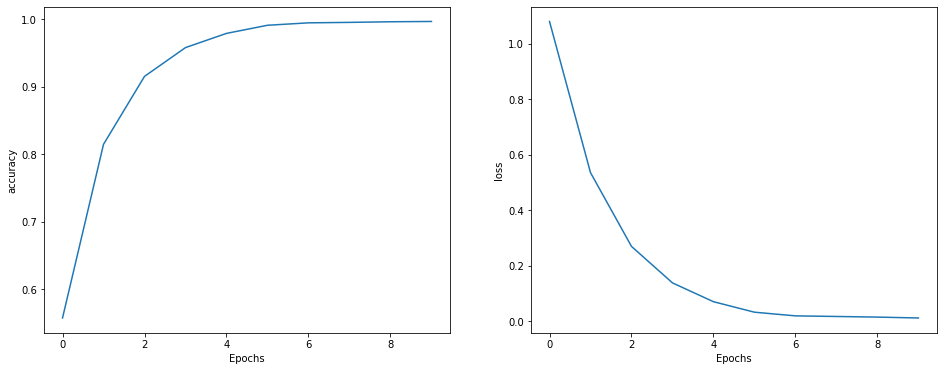

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(h, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(h, 'loss')